# Exploring Dandiset 000690: Vision2Hippocampus Project

**Important Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook provides an exploratory data analysis of Dandiset 000690, version 0.250326.0015, which contains data from the Allen Institute Openscope - Vision2Hippocampus project.

The Dandiset can be found at: [https://dandiarchive.org/dandiset/000690/0.250326.0015](https://dandiarchive.org/dandiset/000690/0.250326.0015)

This Dandiset explores how neural representations of simple and natural stimuli evolve from the LGN through V1, and most hippocampal regions, as well as some of the frontal areas. The project uses simple visual motion (bars of light) and complex, ethologically valid visual stimuli (movies involving eagles and squirrels).

## What This Notebook Will Cover

1.  Loading the Dandiset metadata and exploring its contents.
2.  Loading an NWB file from the Dandiset and examining its structure.
3.  Visualizing eye tracking data.
4.  Visualizing running speed data.
5.  Loading and visualizing neural data from a Neuropixels probe.
6.  Summarizing findings and suggesting future analysis directions.

## Required Packages

The following packages are required to run this notebook:

*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   seaborn

## Loading the Dandiset

We will use the DANDI API to load the Dandiset metadata and list its assets.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Loading an NWB File and Examining Metadata
We will load the NWB file `sub-692072/sub-692072_ses-1298465622.nwb` from the Dandiset and examine its metadata.

We will also show how to get the URL for the asset.  For this NWB file, the URL is: `https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/`

The NWB file structure can be thought of as a hierarchical dictionary, where groups contain subgroups or datasets. The `acquisition` group contains behavioral data like eye tracking and running speed. The `processing` group contains processed data like running speed computed from the raw wheel rotation data.  The `intervals` group contains information about the stimulus presentations.

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

nwb

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


root pynwb.file.NWBFile at 0x139757285870032
Fields:
  acquisition: {
    EyeTracking <class 'abc.EllipseEyeTracking'>,
    raw_running_wheel_rotation <class 'pynwb.base.TimeSeries'>,
    running_wheel_signal_voltage <class 'pynwb.base.TimeSeries'>,
    running_wheel_supply_voltage <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    probeA <class 'abc.EcephysProbe'>,
    probeB <class 'abc.EcephysProbe'>,
    probeE <class 'abc.EcephysProbe'>,
    probeF <class 'abc.EcephysProbe'>
  }
  electrode_groups: {
    probeA <class 'abc.EcephysElectrodeGroup'>,
    probeB <class 'abc.EcephysElectrodeGroup'>,
    probeE <class 'abc.EcephysElectrodeGroup'>,
    probeF <class 'abc.EcephysElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  file_create_date: [datetime.datetime(2025, 2, 25, 16, 36, 10, 235851, tzinfo=tzoffset(None, -28800))]
  identifier: 1298465622
  institution: Allen Institute
  intervals: {
    Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations <class 'pynwb.epoch.TimeIntervals'>,
    Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations <class 'pynwb.epoch.TimeIntervals'>,
    GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations <class 'pynwb.epoch.TimeIntervals'>,
    Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations <class 'pynwb.epoch.TimeIntervals'>,
    SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations <class 'pynwb.epoch.TimeIntervals'>,
    SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations <class 'pynwb.epoch.TimeIntervals'>,
    SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations <class 'pynwb.epoch.TimeIntervals'>,
    SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations <class 'pynwb.epoch.TimeIntervals'>,
    SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations <class 'pynwb.epoch.TimeIntervals'>,
    SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations <class 'pynwb.epoch.TimeIntervals'>,
    SAC_Wd45_Vel2_Bndry1_Cntst0_loop_presentations <class 'pynwb.epoch.TimeIntervals'>,
    UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentations <class 'pynwb.epoch.TimeIntervals'>,
    acurl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations <class 'pynwb.epoch.TimeIntervals'>,
    curl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations <class 'pynwb.epoch.TimeIntervals'>,
    invalid_times <class 'pynwb.epoch.TimeIntervals'>,
    natmovie_CricketsOnARock_540x960Full_584x460Active_presentations <class 'pynwb.epoch.TimeIntervals'>,
    natmovie_EagleSwooping1_540x960Full_584x460Active_presentations <class 'pynwb.epoch.TimeIntervals'>,
    natmovie_EagleSwooping2_540x960Full_584x460Active_presentations <class 'pynwb.epoch.TimeIntervals'>,
    natmovie_SnakeOnARoad_540x960Full_584x460Active_presentations <class 'pynwb.epoch.TimeIntervals'>,
    natmovie_Squirreland3Mice_540x960Full_584x460Active_presentations <class 'pynwb.epoch.TimeIntervals'>,
    receptive_field_block_presentations <class 'pynwb.epoch.TimeIntervals'>
  }
  invalid_times: invalid_times <class 'pynwb.epoch.TimeIntervals'>
  processing: {
    running <class 'pynwb.base.ProcessingModule'>,
    stimulus <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Data and metadata for an Ecephys session
  session_id: 1298465622
  session_start_time: 2023-09-21 00:00:00-07:00
  stimulus_notes: OpenScopeVision2Hippocampus
  subject: subject abc.EcephysSpecimen at 0x139757279046224
Fields:
  age: P82D
  age__reference: birth
  age_in_days: 82.0
  genotype: wt/wt
  sex: M
  species: Mus musculus
  specimen_name: 692072
  strain: Transgenic
  subject_id: 692072

  timestamps_reference_time: 2023-09-21 00:00:00-07:00
  units: units <class 'pynwb.misc.Units'>

## Contents of the NWB File `sub-692072/sub-692072_ses-1298465622.nwb`

```
NWBFile
├── acquisition: LabelledDict
│   └── EyeTracking: EllipseEyeTracking
│       ├── spatial_series: LabelledDict
│       │   ├── corneal_reflection_tracking: EllipseSeries
│       │   ├── eye_tracking: EllipseSeries
│       │   └── pupil_tracking: EllipseSeries
│       ├── likely_blink: TimeSeries
│       ├── raw_running_wheel_rotation: TimeSeries
│       ├── running_wheel_signal_voltage: TimeSeries
│       └── running_wheel_supply_voltage: TimeSeries
├── processing: LabelledDict
│   └── running: ProcessingModule
│       └── data_interfaces: LabelledDict
│           ├── running_speed: TimeSeries
│           ├── running_speed_end_times: TimeSeries
│           └── running_wheel_rotation: TimeSeries
│   └── stimulus: ProcessingModule
│       └── data_interfaces: LabelledDict
│           └── timestamps: TimeSeries
├── electrode_groups: LabelledDict
│   ├── probeA: EcephysElectrodeGroup
│   ├── probeB: EcephysElectrodeGroup
│   ├── probeE: EcephysElectrodeGroup
│   └── probeF: EcephysElectrodeGroup
├── devices: LabelledDict
│   ├── probeA: EcephysProbe
│   ├── probeB: EcephysProbe
│   ├── probeE: EcephysProbe
│   └── probeF: EcephysProbe
├── intervals: LabelledDict
│   ├── Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: TimeIntervals
│   ├── Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: TimeIntervals
│   ├── GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: TimeIntervals
│   ├── Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: TimeIntervals
│   ├── SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: TimeIntervals
│   ├── SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations: TimeIntervals
│   ├── SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations: TimeIntervals
│   ├── SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations: TimeIntervals
│   ├── SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations: TimeIntervals
│   ├── SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations: TimeIntervals
│   ├── SAC_Wd45_Vel2_Bndry1_Cntst0_loop_presentations: TimeIntervals
│   ├── UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: TimeIntervals
│   ├── acurl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations: TimeIntervals
│   ├── curl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations: TimeIntervals
│   └── invalid_times: TimeIntervals
├── stimulus_notes: str
├── electrodes: DynamicTable
├── subject: EcephysSpecimen
├── invalid_times: TimeIntervals
└── units: Units
```

You can explore this NWB file on neurosift: [https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft)
Neurosift is a web-based tool for visualizing and interacting with NWB files. You can use it to explore the data in this NWB file in more detail.

## Loading and Visualizing Eye Tracking Data

The NWB file contains eye tracking data, which can be used to analyze the animal's gaze during the experiment. Here we load the pupil tracking data and plot its position over time.

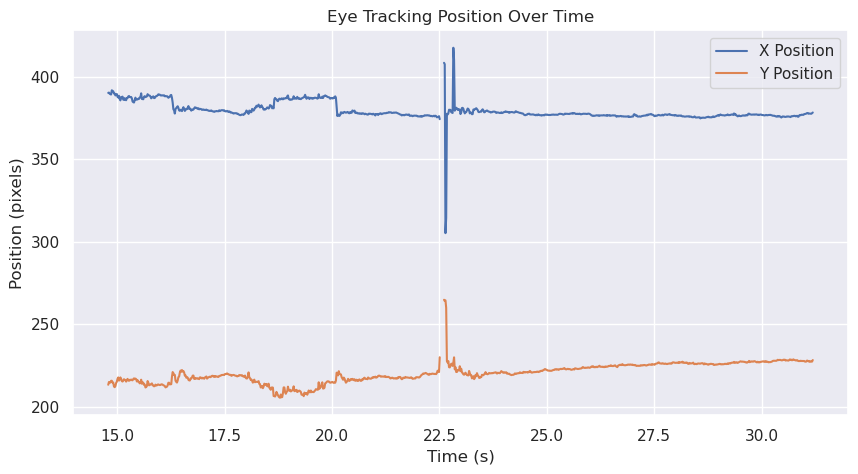

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Get the eye tracking data
eye_tracking = nwb.acquisition["EyeTracking"]
pupil_tracking_data = eye_tracking.pupil_tracking.data
pupil_tracking_timestamps = eye_tracking.pupil_tracking.timestamps

# Plot the eye tracking position over time
num_timepoints = min(1000, len(pupil_tracking_timestamps))  # Limit the number of timepoints to 1000 for faster plotting

plt.figure(figsize=(10, 5))
plt.plot(pupil_tracking_timestamps[:num_timepoints], pupil_tracking_data[:num_timepoints, 0], label="X Position")
plt.plot(pupil_tracking_timestamps[:num_timepoints], pupil_tracking_data[:num_timepoints, 1], label="Y Position")
plt.xlabel("Time (s)")
plt.ylabel("Position (pixels)")
plt.title("Eye Tracking Position Over Time")
plt.legend()
plt.show()

## Loading and Visualizing Running Speed Data

The NWB file also contains running speed data, which can be used to analyze the animal's movement during the experiment. Here we load the running speed data and plot it over time.

Note that the running speed data can sometimes have negative values, which may be due to the sensor properties.

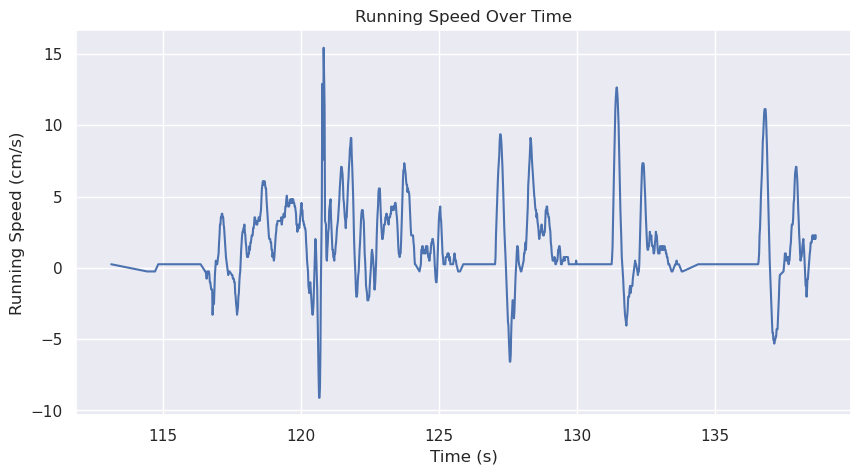

In [4]:
# Get the running speed data
running_speed = nwb.processing["running"].data_interfaces["running_speed"]
running_speed_data = running_speed.data
running_speed_timestamps = running_speed.timestamps

# Plot the running speed over time
num_timepoints = min(1000, len(running_speed_timestamps))  # Limit the number of timepoints to 1000 for faster plotting

plt.figure(figsize=(10, 5))
plt.plot(running_speed_timestamps[:num_timepoints], running_speed_data[:num_timepoints])
plt.xlabel("Time (s)")
plt.ylabel("Running Speed (cm/s)")
plt.title("Running Speed Over Time")
plt.show()

## Loading and Visualizing Neural Data

Here we load and visualize neural data from probeA. We will plot the first 1000 timepoints of the LFP data.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Load LFP data from probeA
electrode_group = nwb.electrode_groups["probeA"]
device = electrode_group.device
sampling_rate = device.sampling_rate

num_electrodes = 30 # only load and plot the first 30 electrodes.. there are many electrodes

# get the electrical series from probeA's device
electrode_table_region = nwb.electrodes.create_region(
    name="selected_electrodes",
    region=list( range(0,num_electrodes)), description="a subset of electrodes"
)

# Find the LFP ElectricalSeries object within the NWB file
lfp_electrical_series = None
for name, obj in nwb.objects.items():
    if isinstance(obj, pynwb.ecephys.ElectricalSeries) and obj.electrode_table_region == electrode_table_region :
        lfp_electrical_series = obj
        break

# Now, plot it
if lfp_electrical_series:

    lfp_data = lfp_electrical_series.data
    lfp_timestamps = lfp_electrical_series.timestamps

    num_timepoints = min(1000, len(lfp_timestamps))  # Limit the number of timepoints to 1000 for faster plotting
    plt.figure(figsize=(10, 5))
    plt.plot(lfp_timestamps[:num_timepoints], lfp_data[:num_timepoints, 0])  # Plot the LFP data from the first electrode
    plt.xlabel("Time (s)")
    plt.ylabel("LFP (uV)")
    plt.title("LFP from probeA (First Electrode)")
    plt.show()
else:
    print("No LFP ElectricalSeries found for probeA's electrodes.  This can be a result of the notebook only loading metadata and excluding the raw data.")

No LFP ElectricalSeries found for probeA's electrodes.  This can be a result of the notebook only loading metadata and excluding the raw data.


## Summarizing Findings and Future Directions

This notebook has demonstrated how to load and explore data from Dandiset 000690, including eye tracking, running speed and neural data.

Possible future directions for analysis include:

*   Analyzing the relationship between eye movements, running speed and neural activity.
*   Investigating the neural activity recorded by the Neuropixels probes in relation to the visual stimuli and behavior.
*   Exploring the stimulus presentation data to understand the experimental design.